In [1]:
import warnings
from matplotlib.ticker import MultipleLocator
import string
from prettytable import PrettyTable
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import re
import ast
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/MultiLabelSongs_RO_prepared.csv")
df['labels'] = df['labels'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
df['labels'] = df['labels'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df['labels'] = df['labels'].str.split(',\s*')
df

,artist,genre,title,album,lyrics,labels
0,Nirvana,Rock,You Know You’re Right,Nirvana,"Nu te voi deranja niciodată, nu mă voi promite...","[Calmness, Sadness]"
1,Damian Marley,Reggae,Here We Go,Stony Hill,Aici mergem ego-ul meu cel mare este gon na mă...,"[Power, Tension]"
2,The Mission UK,Rock,Jade,Another Fall from Grace,Împodobit cu vedete cu aluzia ei abia și un un...,"[Amazement, Calmness, Solemnity, Tenderness]"
3,UB40,Reggae,Food For Thought,Signing Off,Ivory Madonna dying in the dust Waiting for th...,"[Joyful activation, Sadness, Tension]"
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,I was toting my pack along the dusty Winnemucc...,"[Amazement, Calmness, Joyful activation]"
...,...,...,...,...,...,...
1105,Run-D.M.C.,Hip-Hop,King of Rock,King of Rock,"Eu sunt regele rockului, nu există niciun fel ...","[Joyful activation, Power]"
1106,The Beatles,Rock,Yesterday,Help!,Yesterday All my troubles seemed so far away N...,"[Nostalgia, Sadness, Tenderness]"
1107,The Sundays,Rock,Love,Blind,Picture myself as a thin white child Back to t...,"[Calmness, Power, Tenderness]"
1108,The Cure,Rock,Killing an Arab,Boys Don’t Cry,Standing on the beach With a gun in my hand St...,"[Power, Solemnity, Tension]"


In [3]:
unique_genres = df['genre'].unique()
print(len(unique_genres))
print(unique_genres)

4
['Rock' 'Reggae' 'Country' 'Hip-Hop']


In [4]:
unique_artists = df['artist'].unique()
print(len(unique_artists))
print(unique_artists)

94
['Nirvana' 'Damian Marley' 'The Mission UK' 'UB40' 'Johnny Cash'
 'Alan Jackson' 'Snoop Dogg' 'Pink Floyd' 'De La Soul' 'Placebo'
 'The Sundays' 'The Beatles' 'Lauryn Hill' 'Shania Twain'
 'The Mighty Diamonds' 'Kendrick Lamar' 'The Doors' 'Wu-Tang Clan' 'JAY-Z'
 'Yellowman' 'Radiohead' 'Garth Brooks' 'Peter Tosh' 'Soundgarden'
 'Lil Wayne' 'Elvis Presley' 'Dolly Parton' 'The Notorious B.I.G.'
 'Tim McGraw' 'Creed' 'Rita Marley' 'Eminem' 'The Smiths' 'Inner Circle'
 'Shaggy' 'Led Zeppelin' '\u200b\u200bblink-182' 'Martina McBride'
 'Dr.\xa0Dre' 'Reba McEntire' 'Lucky Dube' 'R.E.M.' 'The Kinks' 'The Cure'
 'Burning Spear' 'George Strait' 'Manic Street Preachers' 'Coolio'
 'The Sisters of Mercy' 'Run-D.M.C.' 'J. Cole' 'Post Malone' 'Maxi Priest'
 'Catatonia' 'The Who' '2Pac' 'The Church' 'Merle Haggard' 'N.W.A'
 'Stone Temple Pilots' 'The Replacements' 'David Bowie' 'Drake'
 'Hank Williams' 'Carrie Underwood' 'Kenny Rogers' 'Kanye West' 'Bauhaus'
 'Jah Cure' 'The Jam' 'Kenny Chesney' 

In [5]:
unique_albums = df['album'].unique()
print(len(unique_albums))
print(unique_albums)

561
['Nirvana' 'Stony Hill' 'Another Fall from Grace' 'Signing Off'
 'American II: Unchained' 'Greatest Hits Volume II Disc 1'
 'Paid Tha Cost To Be Da Bo$$' 'The Wall' '3 Feet High and Rising'
 'Covers' 'Reading, Writing, and Arithmetic ' 'Help!'
 'The Miseducation of Lauryn Hill' 'Up!' 'Deeper Roots Plus Dub'
 'good kid, m.A.A.d city (Deluxe Version)' 'The Doors' 'Wu-Tang Forever'
 'The Blueprint 3' 'Nobody Move Nobody Get Hurt'
 'MTV Unplugged in New York' 'A Moon Shaped Pool' 'The Bends' 'The Chase'
 'Bush Doctor' 'Superunknown ' 'Tha Carter III' 'Elvis’ Christmas Album'
 'Jolene' 'Ready to Die' 'Man In Black' 'Not a Moment Too Soon'
 'Human Clay' 'Harambe (Working Together For Freedom)' 'Killshot'
 'The Queen Is Dead' 'Equal Rights' 'Jamaika Me Crazy' 'Pure Pleasure'
 'Led Zeppelin III' 'California (Deluxe Edition)' 'The W' 'Shine'
 'First Round Knock Out' 'The First Chapter' 'Stronger Than the Truth'
 'Captured Live' 'When the Right Time Come (I Need a Roof)'
 'At San Quentin' 'O

In [6]:
unique_emotions = set()
for label in df['labels']:
    emotions = [emotion for emotion in label]
    unique_emotions.update(label)
print(len(unique_emotions))
print(unique_emotions)

9
{'Nostalgia', 'Sadness', 'Amazement', 'Tenderness', 'Joyful activation', 'Solemnity', 'Power', 'Calmness', 'Tension'}


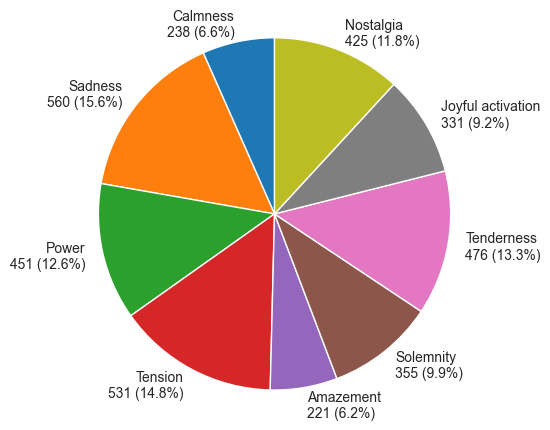

In [7]:
all_emotions = [emotion for sublist in df['labels'] for emotion in sublist]
from collections import Counter
emotion_counts = Counter(all_emotions)

labels = []
sizes = []
for emotion, count in emotion_counts.items():
    labels.append(f"{emotion}\n{count} ({count/sum(emotion_counts.values())*100:.1f}%)")
    sizes.append(count)

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, startangle=90, textprops={'fontsize': 10})
plt.axis('equal')
plt.show()

In [8]:
nr_emotions_per_song = df['labels'].apply(len)
mean_emotions = nr_emotions_per_song.mean()
print(f"Average number of emotions per song: {mean_emotions:.2f}")

Average number of emotions per song: 3.23


Minimum number of words per lyrics: 10
Maximum number of words per lyrics: 1908
Medium number of words per lyrics: 336.70


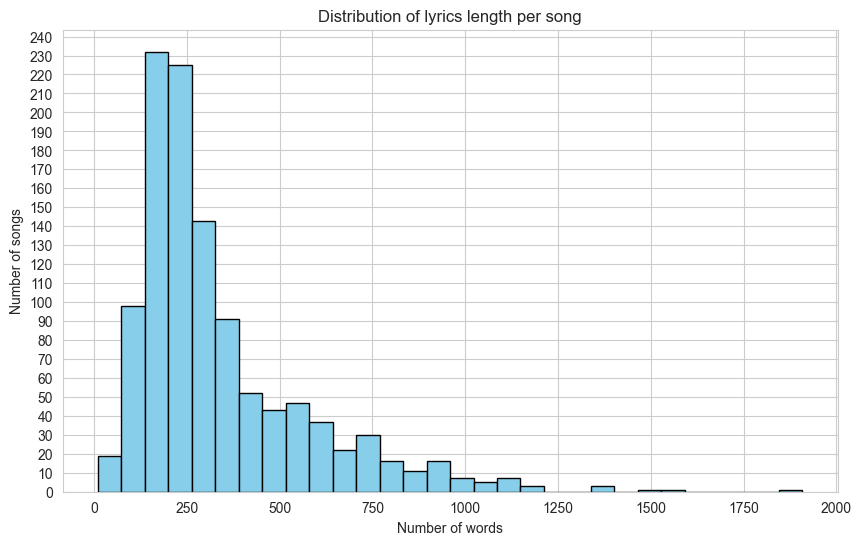

In [9]:
lyrics_lengths_words = df['lyrics'].apply(lambda x: len(str(x).split()))

min_len = lyrics_lengths_words.min()
max_len = lyrics_lengths_words.max()
mean_len = lyrics_lengths_words.mean()

print(f"Minimum number of words per lyrics: {min_len}")
print(f"Maximum number of words per lyrics: {max_len}")
print(f"Medium number of words per lyrics: {mean_len:.2f}")

plt.figure(figsize=(10,6))
plt.hist(lyrics_lengths_words, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of lyrics length per song")
plt.xlabel("Number of words")
plt.ylabel("Number of songs")
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
plt.show()

Minimum number of characters per lyrics: 54
Maximum number of characters per lyrics: 10165
Medium number of characters per lyrics: 1744.38


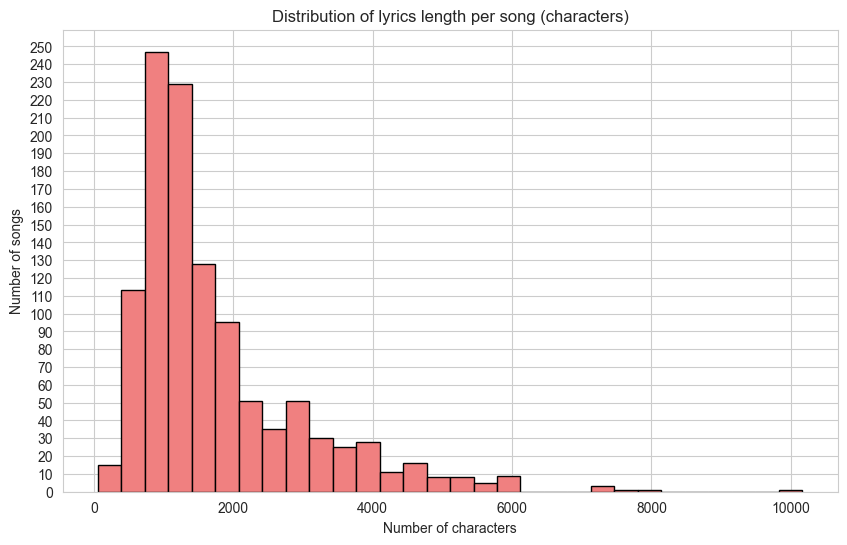

In [10]:
lyrics_lengths_chars = df['lyrics'].apply(lambda x: len(str(x)))
min_len_chars = lyrics_lengths_chars.min()
max_len_chars = lyrics_lengths_chars.max()
mean_len_chars = lyrics_lengths_chars.mean()

print(f"Minimum number of characters per lyrics: {min_len_chars}")
print(f"Maximum number of characters per lyrics: {max_len_chars}")
print(f"Medium number of characters per lyrics: {mean_len_chars:.2f}")

plt.figure(figsize=(10,6))
plt.hist(lyrics_lengths_chars, bins=30, color='lightcoral', edgecolor='black')
plt.title("Distribution of lyrics length per song (characters)")
plt.xlabel("Number of characters")
plt.ylabel("Number of songs")
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
plt.show()

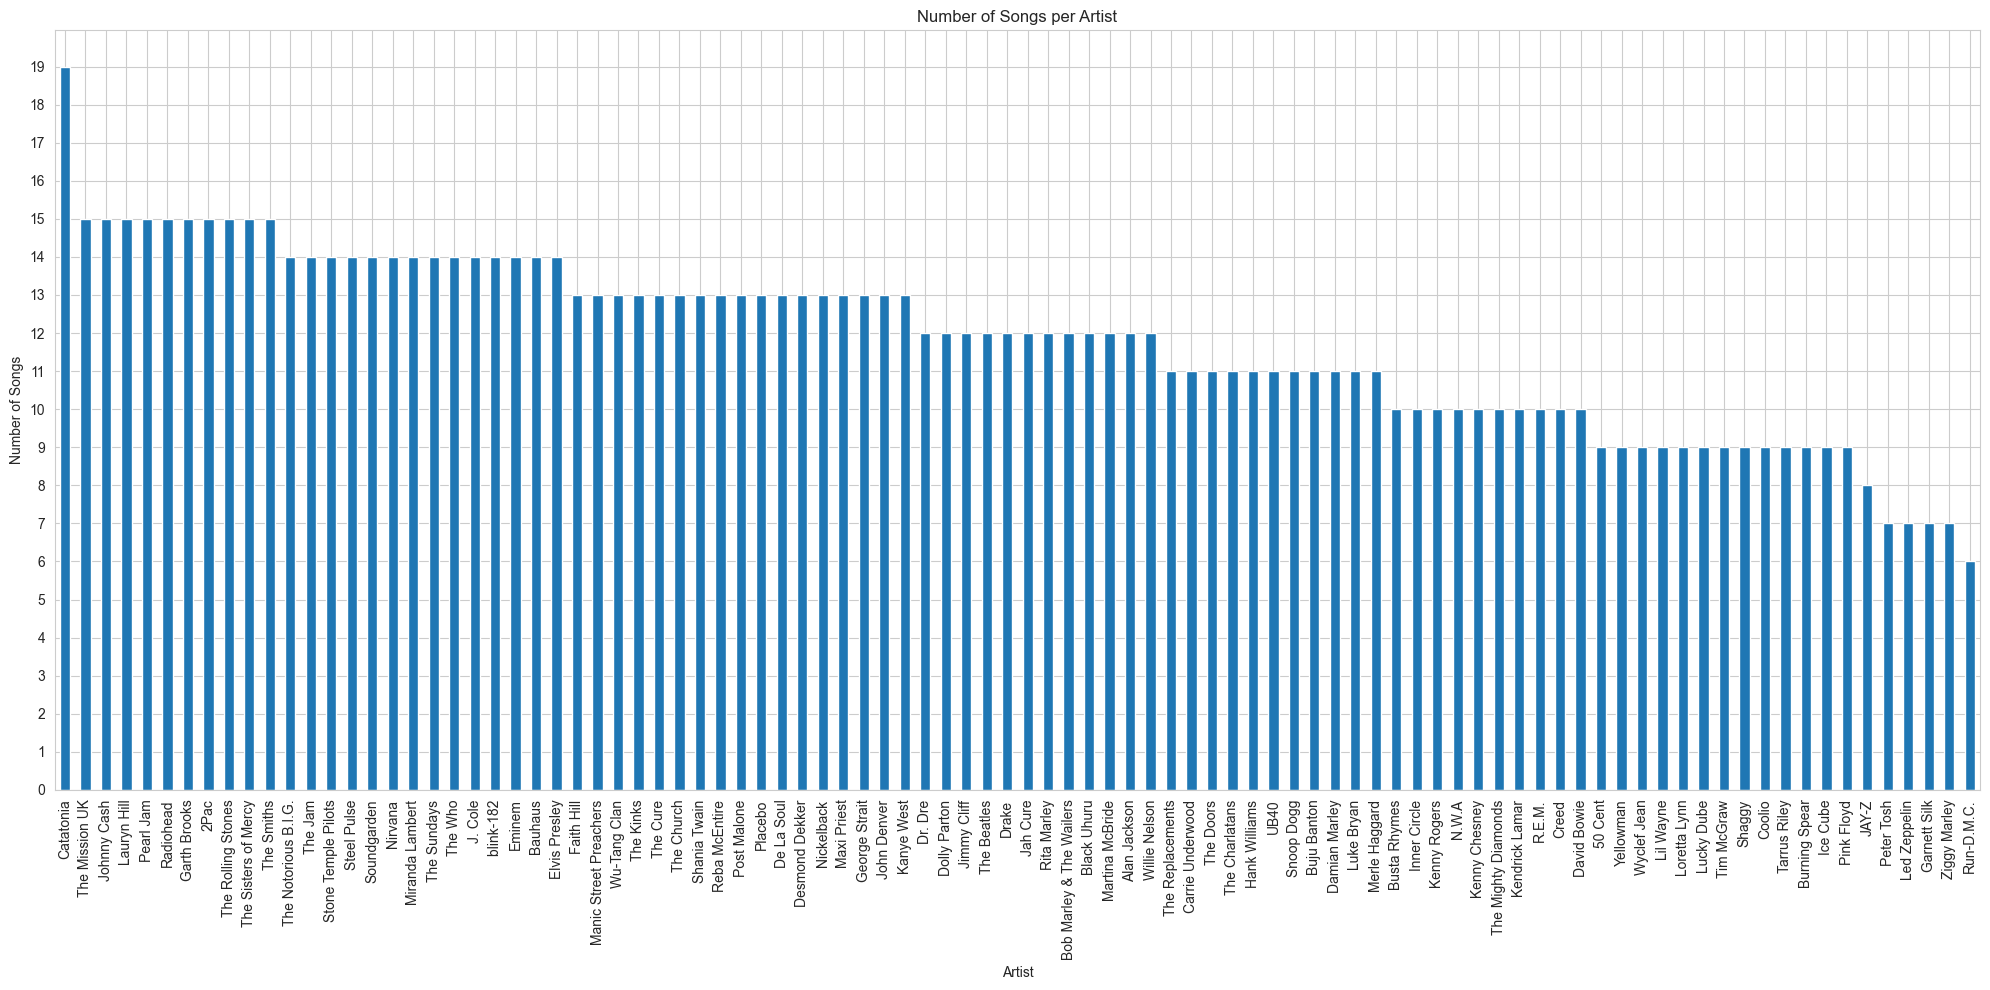

In [11]:
nr_songs_per_artist = df.groupby('artist').size().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
nr_songs_per_artist.plot(kind='bar')
plt.title("Number of Songs per Artist")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
plt.tight_layout()
plt.show()

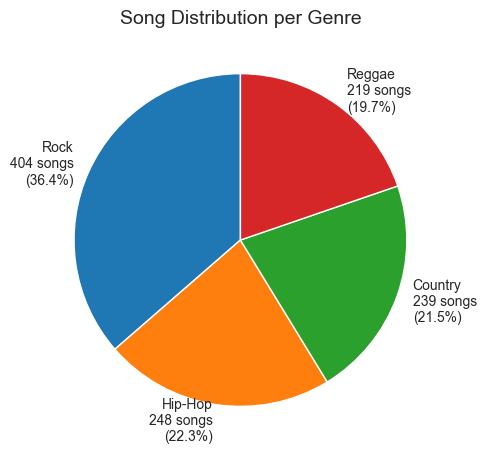

In [12]:
nr_songs_per_genre = df.groupby('genre').size().sort_values(ascending=False)
total_songs = nr_songs_per_genre.sum()

labels = [f"{genre}\n{count} songs\n({count / total_songs * 100:.1f}%)"
          for genre, count in nr_songs_per_genre.items()]

plt.figure(figsize=(5, 5))
plt.pie(nr_songs_per_genre, labels=labels, startangle=90, autopct=None, textprops={'fontsize': 10})
plt.title("Song Distribution per Genre", fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
# Exploding the labels to get one row per emotion per song
df_exploded = df.explode('labels')
df_exploded['labels'] = df_exploded['labels'].str.strip()
df_exploded

,artist,genre,title,album,lyrics,labels
0,Nirvana,Rock,You Know You’re Right,Nirvana,"Nu te voi deranja niciodată, nu mă voi promite...",Calmness
0,Nirvana,Rock,You Know You’re Right,Nirvana,"Nu te voi deranja niciodată, nu mă voi promite...",Sadness
1,Damian Marley,Reggae,Here We Go,Stony Hill,Aici mergem ego-ul meu cel mare este gon na mă...,Power
1,Damian Marley,Reggae,Here We Go,Stony Hill,Aici mergem ego-ul meu cel mare este gon na mă...,Tension
2,The Mission UK,Rock,Jade,Another Fall from Grace,Împodobit cu vedete cu aluzia ei abia și un un...,Amazement
...,...,...,...,...,...,...
1107,The Sundays,Rock,Love,Blind,Picture myself as a thin white child Back to t...,Tenderness
1108,The Cure,Rock,Killing an Arab,Boys Don’t Cry,Standing on the beach With a gun in my hand St...,Power
1108,The Cure,Rock,Killing an Arab,Boys Don’t Cry,Standing on the beach With a gun in my hand St...,Solemnity
1108,The Cure,Rock,Killing an Arab,Boys Don’t Cry,Standing on the beach With a gun in my hand St...,Tension


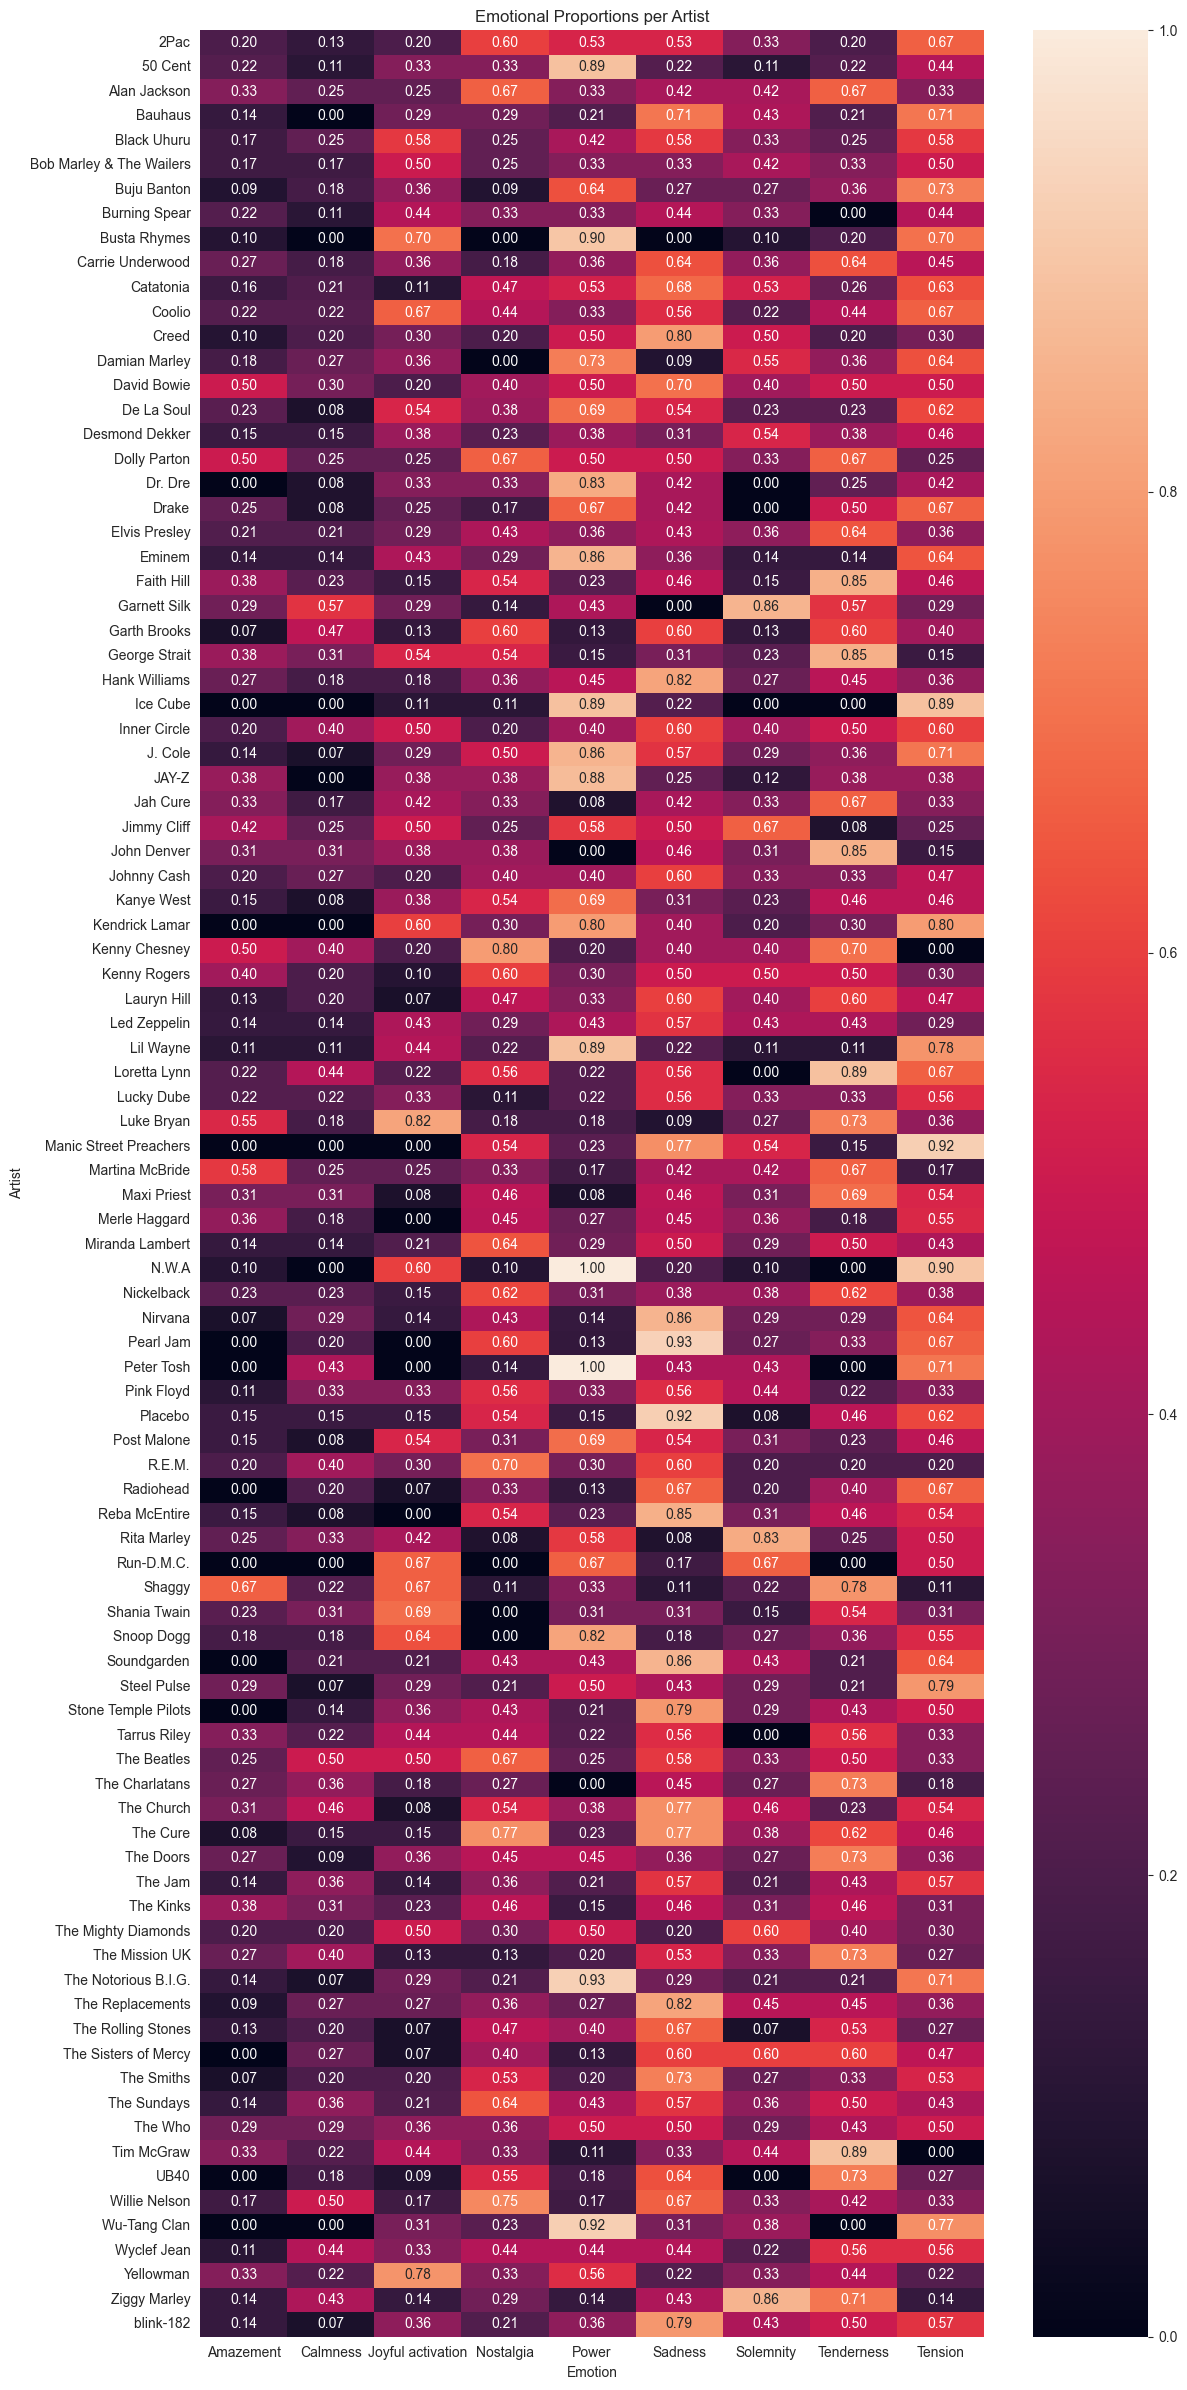

In [14]:
emotions_per_artist = df_exploded.groupby(['artist', 'labels']).size().unstack(fill_value=0)
emotions_proportion = emotions_per_artist.div(nr_songs_per_artist, axis=0)

plt.figure(figsize=(12, 24))
sns.heatmap(emotions_proportion, annot=True, fmt=".2f")
plt.title("Emotional Proportions per Artist")
plt.xlabel("Emotion")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

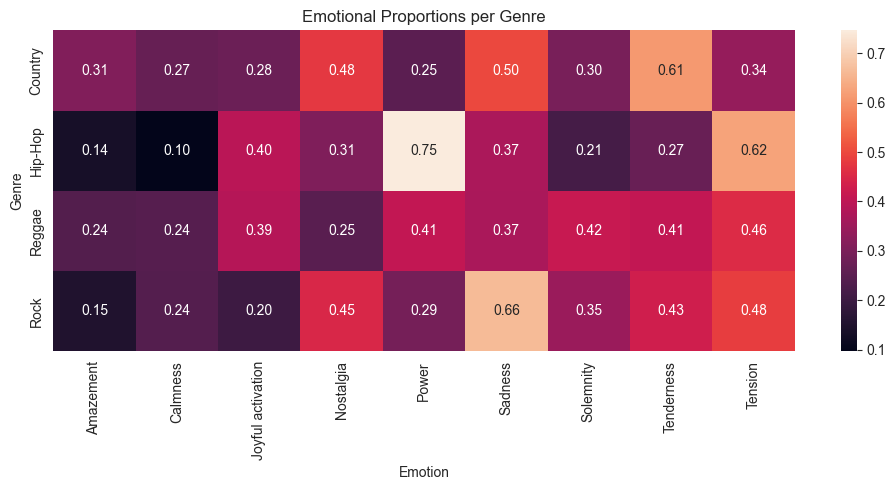

In [15]:
emotions_per_genre = df_exploded.groupby(['genre', 'labels']).size().unstack(fill_value=0)
emotions_proportion = emotions_per_genre.div(nr_songs_per_genre, axis=0)

plt.figure(figsize=(10, 5))
sns.heatmap(emotions_proportion, annot=True, fmt=".2f")
plt.title("Emotional Proportions per Genre")
plt.xlabel("Emotion")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [16]:
lyrics_by_emotion = df_exploded.groupby('labels')['lyrics'].apply(lambda x: ' '.join(x.dropna().astype(str)))

for emotion, text in lyrics_by_emotion.items():
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    word_freq = Counter(words).most_common(10)
    table = PrettyTable()
    table.title = f"Top 10 Words for Emotion: {emotion}"
    table.field_names = ["Word"] + [emotion]
    for word, count in word_freq:
        table.add_row([word, count])
    print(table)
    print()

+-------------------------------------+
| Top 10 Words for Emotion: Amazement |
+-----------+-------------------------+
|    Word   |        Amazement        |
+-----------+-------------------------+
|     de    |           1571          |
|     să    |           1444          |
|     că    |           1368          |
|     nu    |           1322          |
|     în    |           1231          |
|     și    |           1218          |
|     pe    |           1110          |
|     a     |           961           |
|    care   |           924           |
|    este   |           793           |
+-----------+-------------------------+

+------------------------------------+
| Top 10 Words for Emotion: Calmness |
+------------+-----------------------+
|    Word    |        Calmness       |
+------------+-----------------------+
|     de     |          1588         |
|     să     |          1544         |
|     că     |          1406         |
|     și     |          1313         |
|     nu

In [17]:
mlb = MultiLabelBinarizer()
emotion_matrix = mlb.fit_transform(df['labels'])
emotion_df = pd.DataFrame(emotion_matrix, columns=mlb.classes_)

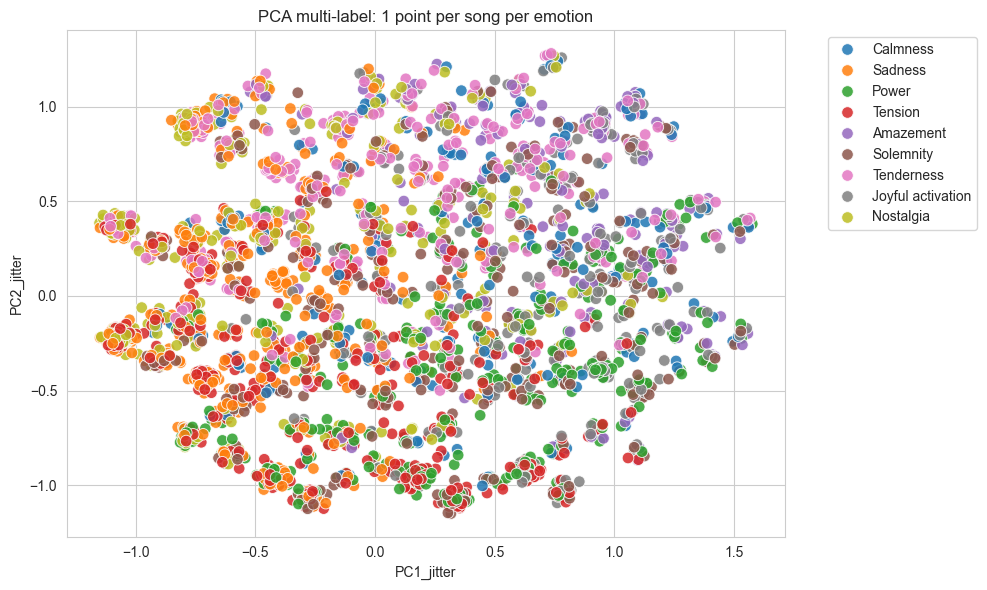

In [18]:
import numpy as np

emotion_df['song_id'] = df.index

pca = PCA(n_components=2)
pca_result = pca.fit_transform(emotion_matrix)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['song_id'] = df.index

df_exploded = df.copy().explode('labels')
df_exploded['song_id'] = df_exploded.index

plot_df = pca_df.merge(df_exploded[['song_id', 'labels']], on='song_id')

np.random.seed(42)
plot_df['PC1_jitter'] = plot_df['PC1'] + np.random.normal(0, 0.03, size=len(plot_df))
plot_df['PC2_jitter'] = plot_df['PC2'] + np.random.normal(0, 0.03, size=len(plot_df))

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x='PC1_jitter', y='PC2_jitter',
    hue='labels',
    palette='tab10',
    s=70,
    alpha=0.85
)
plt.title("PCA multi-label: 1 point per song per emotion")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

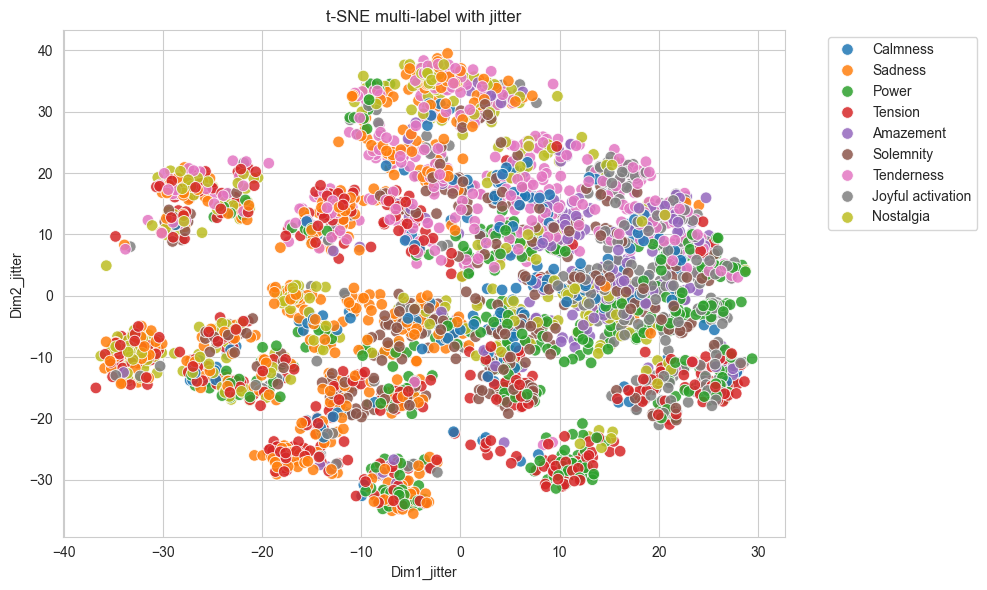

In [19]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(emotion_matrix)

tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['song_id'] = df.index

df_exploded = df.copy().explode('labels')
df_exploded['song_id'] = df_exploded.index
plot_tsne = tsne_df.merge(df_exploded[['song_id', 'labels', 'genre']], on='song_id')

np.random.seed(42)
plot_tsne['Dim1_jitter'] = plot_tsne['Dim1'] + np.random.normal(0, 1.0, size=len(plot_tsne))
plot_tsne['Dim2_jitter'] = plot_tsne['Dim2'] + np.random.normal(0, 1.0, size=len(plot_tsne))

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_tsne,
    x='Dim1_jitter', y='Dim2_jitter',
    hue='labels',
    palette='tab10',
    s=70,
    alpha=0.85
)
plt.title("t-SNE multi-label with jitter")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
import spacy
nlp = spacy.load("ro_core_news_sm")

In [21]:
def simple_tokenize(text):
    return re.findall(r"[\w']+", text)

In [22]:
def remove_named_entities(doc):
    named_entities_tokens = set()
    for ent in doc.ents:
        named_entities_tokens.update([token.i for token in ent])
    tokens_without_ents = [token for token in doc if token.i not in named_entities_tokens]
    return tokens_without_ents

In [23]:
def preprocess_text(text):
    doc = nlp(text)
    tokens_wo_ents = remove_named_entities(doc)
    tokens = [
        token.lemma_.lower() for token in tokens_wo_ents
        if token.is_alpha
        and token.is_ascii
    ]
    return " ".join(tokens).strip()

In [24]:
df['lyrics'] = df['lyrics'].apply(preprocess_text)
df

,artist,genre,title,album,lyrics,labels
0,Nirvana,Rock,You Know You’re Right,Nirvana,nu tu vrea deranja nu vrea promi nu tu vrea nu...,"[Calmness, Sadness]"
1,Damian Marley,Reggae,Here We Go,Stony Hill,aici merge ego meu cel mare fi gon na problemă...,"[Power, Tension]"
2,The Mission UK,Rock,Jade,Another Fall from Grace,cu vedete cu aluzie lui abia un univers dintre...,"[Amazement, Calmness, Solemnity, Tenderness]"
3,UB40,Reggae,Food For Thought,Signing Off,dying in the dust west is her bosom empty as s...,"[Joyful activation, Sadness, Tension]"
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,was toting my pack the dusty winnemucca road w...,"[Amazement, Calmness, Joyful activation]"
...,...,...,...,...,...,...
1105,Run-D.M.C.,Hip-Hop,King of Rock,King of Rock,eu fi rege nu nici_un fel de fraier mai avea t...,"[Joyful activation, Power]"
1106,The Beatles,Rock,Yesterday,Help!,my troubles seemed so far away now it looks as...,"[Nostalgia, Sadness, Tenderness]"
1107,The Sundays,Rock,Love,Blind,pictur myself as a thin white child back to th...,"[Calmness, Power, Tenderness]"
1108,The Cure,Rock,Killing an Arab,Boys Don’t Cry,standing on the beach with al gun in my hand s...,"[Power, Solemnity, Tension]"


In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
romanian_stopwords = stopwords.words('romanian')
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def remove_stopwords(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    filtered_words = [w for w in words if w not in romanian_stopwords]
    filtered_words2 = [w for w in filtered_words if w not in english_stopwords]
    return ' '.join(filtered_words2)

df['lyrics'] = df['lyrics'].apply(remove_stopwords)

In [27]:
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

df['lyrics'] = df['lyrics'].apply(lemmatize_text)

In [28]:
df

,artist,genre,title,album,lyrics,labels
0,Nirvana,Rock,You Know You’re Right,Nirvana,vrea deranja vrea promi vrea vrea deranja vrea...,"[Calmness, Sadness]"
1,Damian Marley,Reggae,Here We Go,Stony Hill,merge ego mare gon na problemă juca erou putea...,"[Power, Tension]"
2,The Mission UK,Rock,Jade,Another Fall from Grace,vedet aluzie univers abilita cuvânt cicatric s...,"[Amazement, Calmness, Solemnity, Tenderness]"
3,UB40,Reggae,Food For Thought,Signing Off,dying dust West bosom empty skies creepinge kn...,"[Joyful activation, Sadness, Tension]"
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,toting pack dusty winnemucca road alonge sem h...,"[Amazement, Calmness, Joyful activation]"
...,...,...,...,...,...,...
1105,Run-D.M.C.,Hip-Hop,King of Rock,King of Rock,rege nici_un fraier trebui sune sire arde treb...,"[Joyful activation, Power]"
1106,The Beatles,Rock,Yesterday,Help!,troublede seemed far away looks though stay be...,"[Nostalgia, Sadness, Tenderness]"
1107,The Sundays,Rock,Love,Blind,pictur thin white child Back day born slapped ...,"[Calmness, Power, Tenderness]"
1108,The Cure,Rock,Killing an Arab,Boys Don’t Cry,standing beach Gun hand staring sea staringe s...,"[Power, Solemnity, Tension]"


In [182]:
df.to_csv('../data/MultiLabelSongs_RO_prepared_preprocessed.csv', index=False)

In [29]:
from collections import defaultdict, Counter
import string
from prettytable import PrettyTable

emotion_lyrics_map = defaultdict(list)

for _, row in df.iterrows():
    lyrics = str(row['lyrics']).lower().translate(str.maketrans('', '', string.punctuation))
    for emotion in row['labels']:
        emotion_lyrics_map[emotion.strip()].append(lyrics)

for emotion, lyrics_list in emotion_lyrics_map.items():
    full_text = ' '.join(lyrics_list)
    words = full_text.split()
    word_freq = Counter(words).most_common(10)

    table = PrettyTable()
    table.title = f"Top 10 Words for Emotion: {emotion}"
    table.field_names = ["Word", "Frequency"]
    for word, count in word_freq:
        table.add_row([word, count])

    print(table)
    print()

+------------------------------------+
| Top 10 Words for Emotion: Calmness |
+--------------+---------------------+
|     Word     |      Frequency      |
+--------------+---------------------+
|     vrea     |         781         |
|    putea     |         388         |
|     sine     |         378         |
|    spune     |         329         |
|     timp     |         261         |
|    lucru     |         191         |
|    trebui    |         183         |
|     bine     |         167         |
|     acum     |         144         |
|    merge     |         116         |
+--------------+---------------------+

+-----------------------------------+
| Top 10 Words for Emotion: Sadness |
+--------------+--------------------+
|     Word     |     Frequency      |
+--------------+--------------------+
|     vrea     |        1867        |
|    putea     |        1030        |
|    spune     |        868         |
|     sine     |        756         |
|     timp     |        650      

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['lyrics'].fillna(''))
numar_termeni_unici = len(tfidf.vocabulary_)
print(f"Număr total de termeni unici în corpus: {numar_termeni_unici}")

Număr total de termeni unici în corpus: 12055


In [31]:
tfidf = TfidfVectorizer(max_features=300)
tfidf_matrix = tfidf.fit_transform(df_exploded['lyrics'].fillna(''))

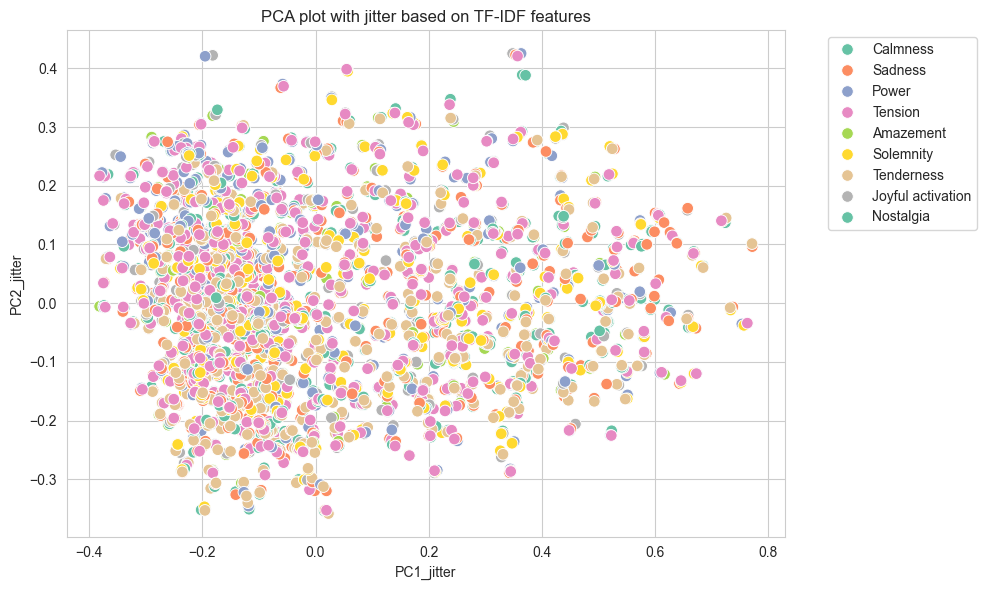

In [35]:
import numpy as np

tfidf_dense = tfidf_matrix.toarray()

pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(tfidf_dense)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

pca_df['labels'] = df_exploded['labels'].values

jitter_strength = 0.003
pca_df['PC1_jitter'] = pca_df['PC1'] + np.random.normal(0, jitter_strength, size=pca_df.shape[0])
pca_df['PC2_jitter'] = pca_df['PC2'] + np.random.normal(0, jitter_strength, size=pca_df.shape[0])

plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1_jitter', y='PC2_jitter', hue='labels', palette='Set2', s=70)
plt.title("PCA plot with jitter based on TF-IDF features")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

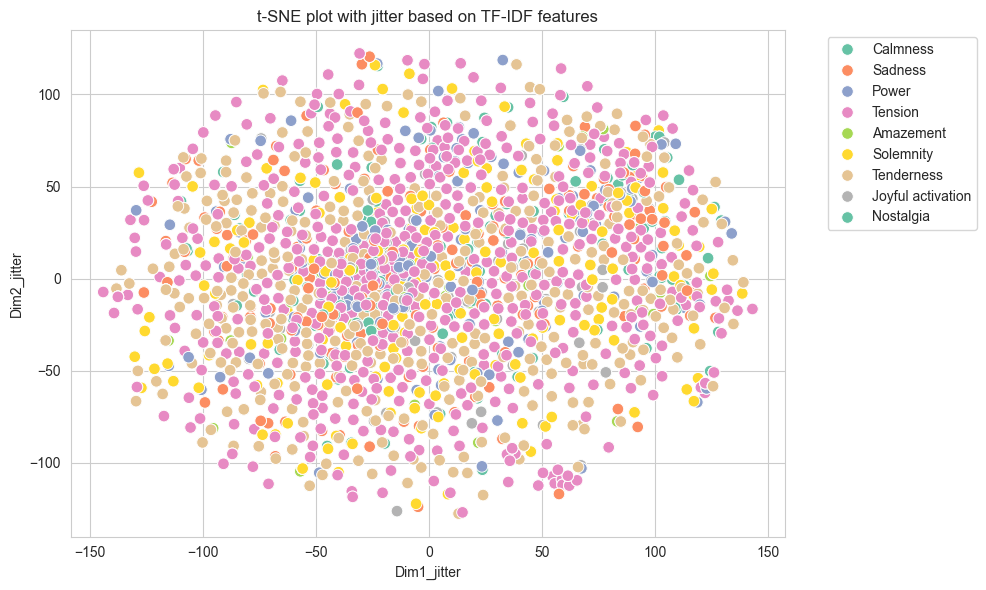

In [33]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_jobs=-1)
tsne_result = tsne.fit_transform(tfidf_dense)
tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['labels'] = df_exploded['labels'].values

jitter_strength = 0.003
np.random.seed(42)
tsne_df['Dim1_jitter'] = tsne_df['Dim1'] + np.random.normal(0, jitter_strength, size=tsne_df.shape[0])
tsne_df['Dim2_jitter'] = tsne_df['Dim2'] + np.random.normal(0, jitter_strength, size=tsne_df.shape[0])

plt.figure(figsize=(10,6))
sns.scatterplot(data=tsne_df, x='Dim1_jitter', y='Dim2_jitter', hue='labels', palette='Set2', s=70)
plt.title("t-SNE plot with jitter based on TF-IDF features")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()